In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("synthetic_cancer_prediction_dataset.csv")
df

,Age,Gender,Tumor_Size_mm,Tumor_Location,Cancer_Stage,Cancer_Grade,Lymph_Node_Involvement,Metastasis,Smoking_Status,Alcohol_Consumption,Family_History,PSA_Level,HER2_Status,BRCA1_Mutation,Cancer_Type
0,71,Male,48.9,Colon,Stage I,Medium,No,Yes,Former smoker,NaN,Yes,3.88,Positive,Present,Malignant
1,34,NaN,78.4,Lung,Stage II,High,Yes,Yes,Non-smoker,Occasional,Yes,4.02,Negative,Present,Benign
2,80,Female,43.9,Lung,Stage III,Medium,Yes,Yes,Non-smoker,Regular,Yes,6.49,Negative,Absent,Malignant
3,40,Female,22.3,Prostate,Stage IV,Low,No,No,Former smoker,Regular,No,7.04,Positive,Absent,Benign
4,43,Male,1.0,Colon,Stage II,Low,Yes,No,Current smoker,NaN,No,5.07,Negative,Present,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,38,Female,27.1,Lung,Stage III,High,No,No,Former smoker,NaN,No,2.07,Positive,Absent,Benign
13996,58,Female,52.8,Breast,Stage II,Medium,No,Yes,Current smoker,Occasional,No,3.80,Negative,Absent,Benign
13997,32,Male,48.1,Breast,Stage IV,Medium,Yes,No,Former smoker,Occasional,No,6.51,Negative,Absent,Malignant
13998,24,Male,26.4,Colon,Stage II,Low,No,No,Non-smoker,Regular,Yes,1.96,Positive,Present,Malignant


In [3]:
df.isnull().sum()

Age                          0
Gender                     700
Tumor_Size_mm                0
Tumor_Location             700
Cancer_Stage               700
Cancer_Grade                 0
Lymph_Node_Involvement       0
Metastasis                   0
Smoking_Status             700
Alcohol_Consumption       4712
Family_History               0
PSA_Level                    0
HER2_Status                  0
BRCA1_Mutation               0
Cancer_Type                700
dtype: int64

In [4]:
df_cleaned = df.dropna(subset=['Cancer_Type'])

categorical_columns = ['Gender', 'Tumor_Location', 'Cancer_Stage', 'Smoking_Status']

for col in categorical_columns:
    mode_value = df_cleaned[col].mode()[0]
    df_cleaned[col].fillna(mode_value, inplace=True)

df_cleaned

C:\Users\Hardik Agarwal\AppData\Local\Temp\ipykernel_26436\694832419.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(mode_value, inplace=True)
C:\Users\Hardik Agarwal\AppData\Local\Temp\ipykernel_26436\694832419.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col].fillna(mode_value, inplace=True)


,Age,Gender,Tumor_Size_mm,Tumor_Location,Cancer_Stage,Cancer_Grade,Lymph_Node_Involvement,Metastasis,Smoking_Status,Alcohol_Consumption,Family_History,PSA_Level,HER2_Status,BRCA1_Mutation,Cancer_Type
0,71,Male,48.9,Colon,Stage I,Medium,No,Yes,Former smoker,NaN,Yes,3.88,Positive,Present,Malignant
1,34,Female,78.4,Lung,Stage II,High,Yes,Yes,Non-smoker,Occasional,Yes,4.02,Negative,Present,Benign
2,80,Female,43.9,Lung,Stage III,Medium,Yes,Yes,Non-smoker,Regular,Yes,6.49,Negative,Absent,Malignant
3,40,Female,22.3,Prostate,Stage IV,Low,No,No,Former smoker,Regular,No,7.04,Positive,Absent,Benign
4,43,Male,1.0,Colon,Stage II,Low,Yes,No,Current smoker,NaN,No,5.07,Negative,Present,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,38,Female,27.1,Lung,Stage III,High,No,No,Former smoker,NaN,No,2.07,Positive,Absent,Benign
13996,58,Female,52.8,Breast,Stage II,Medium,No,Yes,Current smoker,Occasional,No,3.80,Negative,Absent,Benign
13997,32,Male,48.1,Breast,Stage IV,Medium,Yes,No,Former smoker,Occasional,No,6.51,Negative,Absent,Malignant
13998,24,Male,26.4,Colon,Stage II,Low,No,No,Non-smoker,Regular,Yes,1.96,Positive,Present,Malignant


In [5]:
df_cleaned.isnull().sum()


Age                          0
Gender                       0
Tumor_Size_mm                0
Tumor_Location               0
Cancer_Stage                 0
Cancer_Grade                 0
Lymph_Node_Involvement       0
Metastasis                   0
Smoking_Status               0
Alcohol_Consumption       4464
Family_History               0
PSA_Level                    0
HER2_Status                  0
BRCA1_Mutation               0
Cancer_Type                  0
dtype: int64

In [6]:
# Fill missing values in 'Alcohol_Consumption' with its mode
alcohol_mode = df_cleaned['Alcohol_Consumption'].mode()[0]
df_cleaned['Alcohol_Consumption'].fillna(alcohol_mode, inplace=True)
df_cleaned

C:\Users\Hardik Agarwal\AppData\Local\Temp\ipykernel_26436\2251805770.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Alcohol_Consumption'].fillna(alcohol_mode, inplace=True)
C:\Users\Hardik Agarwal\AppData\Local\Temp\ipykernel_26436\2251805770.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Alcohol_Consumption'

,Age,Gender,Tumor_Size_mm,Tumor_Location,Cancer_Stage,Cancer_Grade,Lymph_Node_Involvement,Metastasis,Smoking_Status,Alcohol_Consumption,Family_History,PSA_Level,HER2_Status,BRCA1_Mutation,Cancer_Type
0,71,Male,48.9,Colon,Stage I,Medium,No,Yes,Former smoker,Regular,Yes,3.88,Positive,Present,Malignant
1,34,Female,78.4,Lung,Stage II,High,Yes,Yes,Non-smoker,Occasional,Yes,4.02,Negative,Present,Benign
2,80,Female,43.9,Lung,Stage III,Medium,Yes,Yes,Non-smoker,Regular,Yes,6.49,Negative,Absent,Malignant
3,40,Female,22.3,Prostate,Stage IV,Low,No,No,Former smoker,Regular,No,7.04,Positive,Absent,Benign
4,43,Male,1.0,Colon,Stage II,Low,Yes,No,Current smoker,Regular,No,5.07,Negative,Present,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,38,Female,27.1,Lung,Stage III,High,No,No,Former smoker,Regular,No,2.07,Positive,Absent,Benign
13996,58,Female,52.8,Breast,Stage II,Medium,No,Yes,Current smoker,Occasional,No,3.80,Negative,Absent,Benign
13997,32,Male,48.1,Breast,Stage IV,Medium,Yes,No,Former smoker,Occasional,No,6.51,Negative,Absent,Malignant
13998,24,Male,26.4,Colon,Stage II,Low,No,No,Non-smoker,Regular,Yes,1.96,Positive,Present,Malignant


In [7]:
df_cleaned.isnull().sum()


Age                       0
Gender                    0
Tumor_Size_mm             0
Tumor_Location            0
Cancer_Stage              0
Cancer_Grade              0
Lymph_Node_Involvement    0
Metastasis                0
Smoking_Status            0
Alcohol_Consumption       0
Family_History            0
PSA_Level                 0
HER2_Status               0
BRCA1_Mutation            0
Cancer_Type               0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
label_encoders = {}
for col in df_cleaned.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

print("Sample encoded values:")
print(df_cleaned.head())

Sample encoded values:
   Age  Gender  Tumor_Size_mm  Tumor_Location  Cancer_Stage  Cancer_Grade  \
0   71       1           48.9               1             0             2   
1   34       0           78.4               2             1             0   
2   80       0           43.9               2             2             2   
3   40       0           22.3               3             3             1   
4   43       1            1.0               1             1             1   

   Lymph_Node_Involvement  Metastasis  Smoking_Status  Alcohol_Consumption  \
0                       0           1               1                    1   
1                       1           1               2                    0   
2                       1           1               2                    1   
3                       0           0               1                    1   
4                       1           0               0                    1   

   Family_History  PSA_Level  HER2_Status  BR

C:\Users\Hardik Agarwal\AppData\Local\Temp\ipykernel_26436\565899417.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = le.fit_transform(df_cleaned[col])
C:\Users\Hardik Agarwal\AppData\Local\Temp\ipykernel_26436\565899417.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = le.fit_transform(df_cleaned[col])
C:\Users\Hardik Agarwal\AppData\Local\Temp\ipykernel_26436\565899417.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [10]:
X = df_cleaned.drop(columns=['Cancer_Type'])  # Features
y = df_cleaned['Cancer_Type']                 # Target (already encoded)


In [11]:
X

,Age,Gender,Tumor_Size_mm,Tumor_Location,Cancer_Stage,Cancer_Grade,Lymph_Node_Involvement,Metastasis,Smoking_Status,Alcohol_Consumption,Family_History,PSA_Level,HER2_Status,BRCA1_Mutation
0,71,1,48.9,1,0,2,0,1,1,1,1,3.88,1,1
1,34,0,78.4,2,1,0,1,1,2,0,1,4.02,0,1
2,80,0,43.9,2,2,2,1,1,2,1,1,6.49,0,0
3,40,0,22.3,3,3,1,0,0,1,1,0,7.04,1,0
4,43,1,1.0,1,1,1,1,0,0,1,0,5.07,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,38,0,27.1,2,2,0,0,0,1,1,0,2.07,1,0
13996,58,0,52.8,0,1,2,0,1,0,0,0,3.80,0,0
13997,32,1,48.1,0,3,2,1,0,1,0,0,6.51,0,0
13998,24,1,26.4,1,1,1,0,0,2,1,1,1.96,1,1


In [12]:
y

0        1
1        0
2        1
3        0
4        0
        ..
13995    0
13996    0
13997    1
13998    1
13999    0
Name: Cancer_Type, Length: 13300, dtype: int32

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Check sizes of splits
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)


Training features shape: (10640, 14)
Testing features shape: (2660, 14)
Training labels shape: (10640,)
Testing labels shape: (2660,)


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [16]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [17]:
y_pred = model.predict(X_test)

y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [18]:
accuracy = accuracy_score(y_test, y_pred)
print("✅ Accuracy:", round(accuracy * 100, 2), "%")


✅ Accuracy: 58.42 %


In [19]:
print("\n Classification Report:\n", classification_report(y_test, y_pred))



 Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.88      0.72      1604
           1       0.42      0.13      0.20      1056

    accuracy                           0.58      2660
   macro avg       0.52      0.51      0.46      2660
weighted avg       0.53      0.58      0.51      2660



In [20]:
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



 Confusion Matrix:
 [[1415  189]
 [ 917  139]]


In [21]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data, then transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check scaled values (optional)
print("First 5 scaled training rows:\n", X_train_scaled[:5])


First 5 scaled training rows:
 [[ 0.10418204 -0.94493472  0.75275459  0.7592723   1.23426753 -1.23029217
  -1.01629821  0.99662225  1.26952686  0.70148189 -1.00112846  0.64459315
   1.00811564 -0.99512467]
 [ 1.06322763  1.05827417 -0.68072479 -0.6712115   0.36085661  1.22567569
  -1.01629821 -1.0033892   0.06336865 -1.42555354  0.99887282  0.24887319
  -0.9919497   1.00489922]
 [ 0.90338669  1.05827417 -0.18003582 -0.6712115  -1.38596521 -1.23029217
   0.98396316  0.99662225 -1.14278956 -1.42555354  0.99887282  2.06005297
  -0.9919497  -0.99512467]
 [ 1.27634887  1.05827417 -1.01680368  1.4745142  -1.38596521 -0.00230824
   0.98396316 -1.0033892   1.26952686  0.70148189  0.99887282 -0.62881336
  -0.9919497  -0.99512467]
 [ 1.16978825 -0.94493472 -1.81927778  1.4745142   1.23426753 -0.00230824
   0.98396316  0.99662225  0.06336865 -1.42555354 -1.00112846 -0.16714009
   1.00811564  1.00489922]]


C:\Users\Hardik Agarwal\AppData\Local\Temp\ipykernel_26436\1003879720.py:11: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.tight_layout()
C:\Users\Hardik Agarwal\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


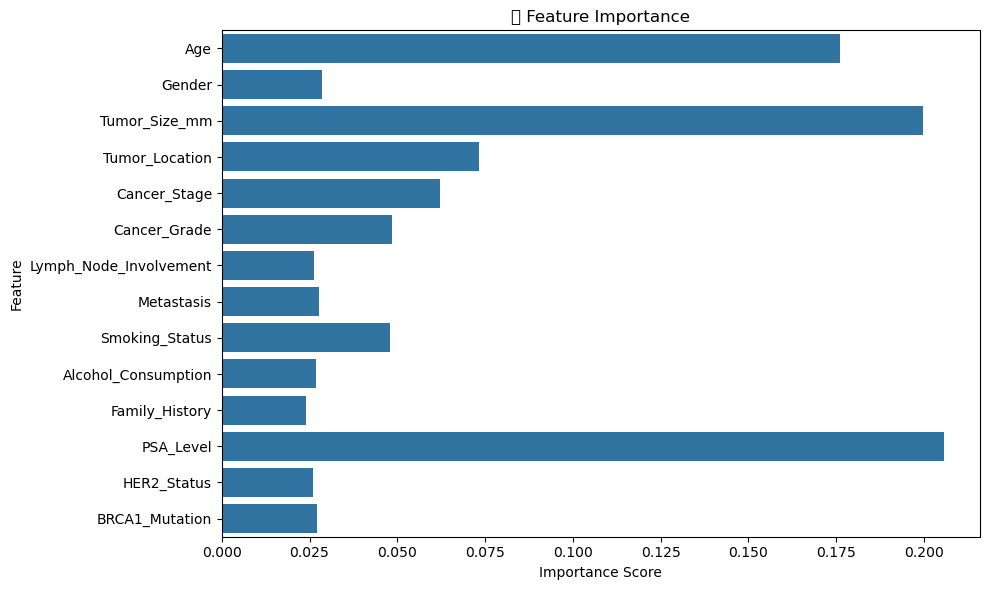

In [22]:

# Get feature importances from your trained model 
importances = model.feature_importances_
feature_names = X.columns

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("🔍 Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
